# Introdução
Este projeto é baseado na webinar [Detectando faces em imagens com python e opencv](https://maribneiva.medium.com/detectando-faces-em-imagens-com-python-e-opencv-930e634e7a17) e inspirado na aplicação de filtro do instagram na face com mais destaque em uma foto.

Portanto, o objetivo é identificar e modificar as faces em uma imagem de acordo com seu destaque na foto.


# Importação de pacotes e leitura da imagem
A imagem utilizada pode ser encontrada [neste link](https://unsplash.com/photos/0FluoIcN0G8).

In [13]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

In [28]:
imagePath = '/content/junior-reis-0FluoIcN0G8-unsplash_Easy-Resize.com.jpg'
image = cv2.imread(imagePath)

# Detecção de faces
Para a detecção das faces é preciso manipular a imagem e deixá-la em escala de cinza. Nós podemos ver que três faces foram identificadas, como o esperado.

In [31]:
cascadePath = 'haarcascade_frontalface_default.xml'
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "/haarcascade_frontalface_default.xml")

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faces = faceCascade.detectMultiScale(
    gray, 
    minNeighbors = 5,
    minSize=(30, 30),
    flags = cv2.CASCADE_SCALE_IMAGE
)
print("Encontradas {0} faces!".format(len(faces)))

Encontradas 3 faces!


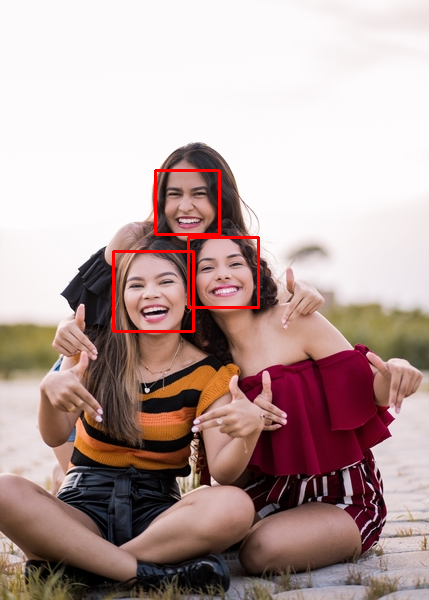

In [32]:
rectanglesImage = image.copy()
for (x, y, w, h) in faces:
  cv2.rectangle(rectanglesImage, (x, y), (x+w, y+h), (0, 0, 255), 2)
cv2_imshow(rectanglesImage)

# Identificação da região de interesse (ROI)

Será necessário identificar a região de interesse que tem a maior área para a identificação da pessoa com maior destaque na foto, assim é possível mudar a cor dessa ROI para um tom avermelhado e embaçar as restantes.
Além disso, a intensidade do blur é determinada pela largura da ROI.

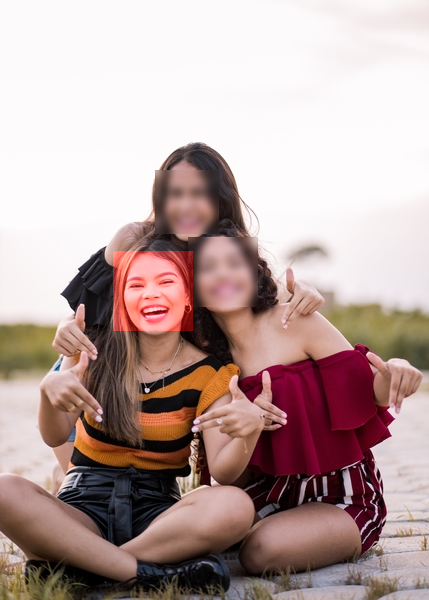

In [33]:
areas = faces[:,2] * faces[:,3]
maxArea = areas.max()
imageReddishBlur = image.copy()

for (x, y, w, h) in faces:  
  ROI = image[y:y+h, x:x+w,:]
  if maxArea == w * h:
    red = np.zeros_like(ROI); 
    red[:,:] = [0,0,100]; #(b,g,r)
    
    reddish = cv2.add(ROI, red);
    reddish[reddish > 255] = 255
    
    imageReddishBlur[y:y+h, x:x+w] = reddish
  else:
    kernel = np.ones((5,5),np.float32)/25
    blur = cv2.filter2D(ROI,-1,kernel)
    for _ in range(1, w // 10):
      blur = cv2.filter2D(blur,-1,kernel)
      blur[blur > 255] = 255

      imageReddishBlur[y:y+h, x:x+w] = blur

cv2_imshow(imageReddishBlur) 